In [29]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
dotenv.load_dotenv()
username=os.getenv("username2")
password=os.getenv("password")
host=os.getenv("host")
dbname='Titanic'
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)
query = "SELECT * FROM titanic"
df = pd.read_sql(query, db_engine)
db_engine.dispose()
df.shape
df

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [13]:
"""Quanti ponti c'erano sulla nave?"""
df['Deck'] = df['Cabin'].str[0]
df['Deck'].unique()
df['Deck']        

0       NaN
1         C
2       NaN
3         C
4       NaN
       ... 
1304    NaN
1305      C
1306    NaN
1307    NaN
1308    NaN
Name: Deck, Length: 1309, dtype: object

<Axes: xlabel='PClass', ylabel='count'>

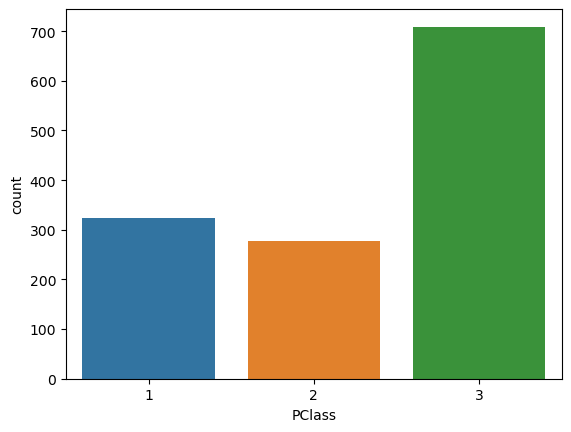

In [26]:
"""Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco"""
import seaborn as sns
sns.countplot(data=df, x='PClass')

<Axes: xlabel='Survived', ylabel='count'>

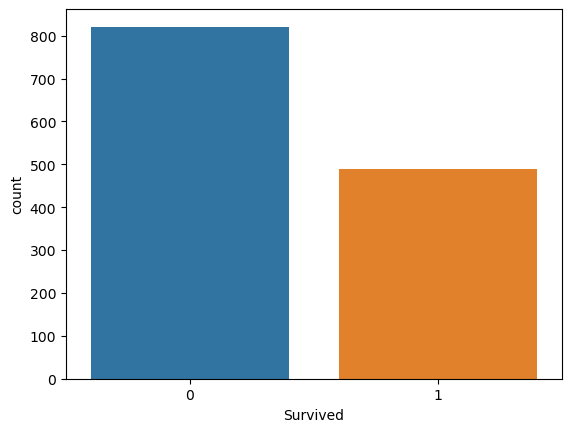

In [23]:
"""Fare la stessa cosa per la colonna alive"""
sns.countplot(data=df, x='Survived')


<Axes: ylabel='Frequency'>

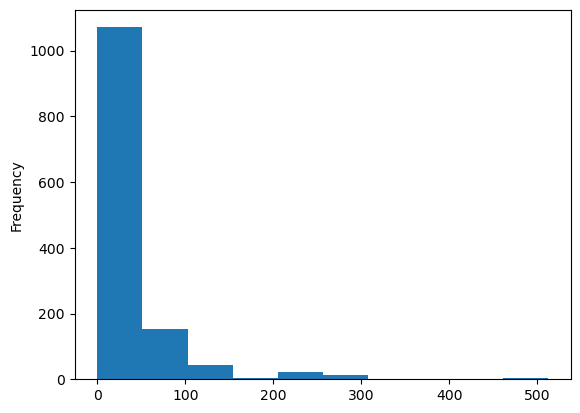

In [31]:
"""Qual era la distribuzione delle tariffe (fare)?"""
df.Fare.plot(kind='hist')

<Axes: xlabel='PClass', ylabel='Age'>

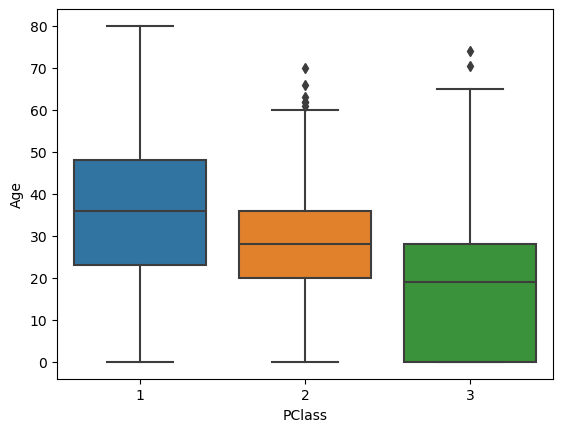

In [32]:
"""Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con un violinplot"""
sns.boxplot(data=df, x='PClass', y='Age')

<Axes: xlabel='PClass', ylabel='Age'>

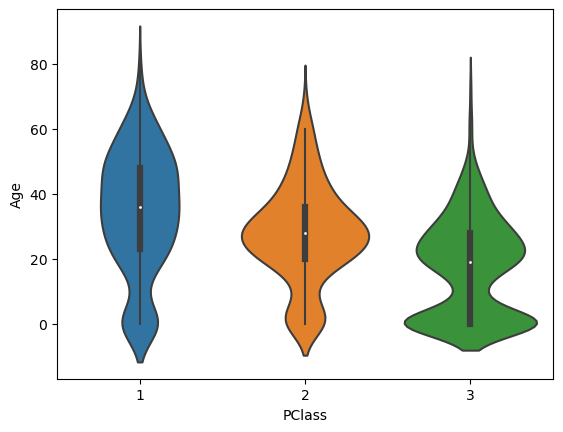

In [33]:
sns.violinplot(data=df, x='PClass', y='Age')

<Axes: xlabel='Survived', ylabel='Fare'>

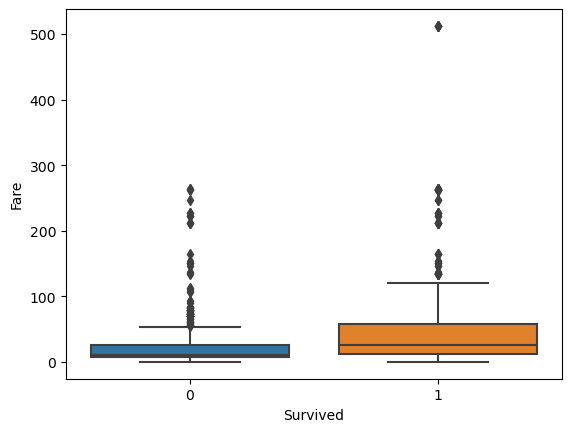

In [35]:
"""Visualizziamo un boxplot rispetto alle colonne fare e survived"""
sns.boxplot(data=df, x='Survived', y='Fare')

In [59]:
df = pd.read_csv("C:\\Users\\Miriana Albergo\\EpicodeP\\stockdata.csv")
df

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


In [62]:
df['Date'] = pd.to_datetime(df['Date'], format ='%Y-%m-%d')
df.set_index('Date', drop=False, inplace=True)

<Axes: xlabel='Date'>

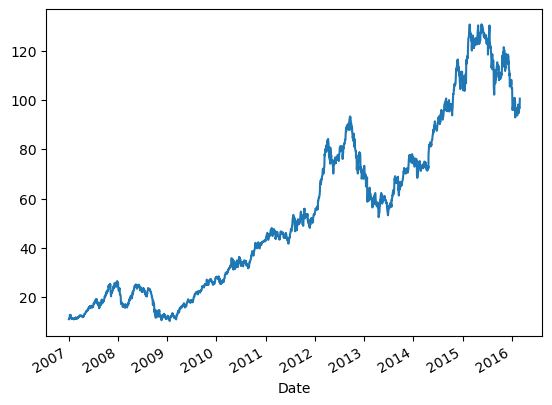

In [51]:
"""Visualizziamo l'andamento delle azioni della Apple ("AAPL")"""
df.AAPL.plot()

<Axes: xlabel='Date'>

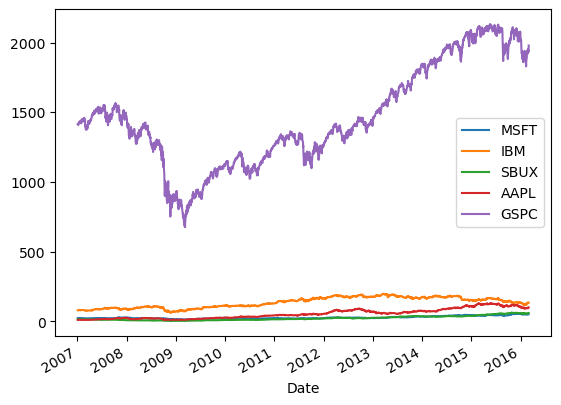

In [52]:
"""Visualizziamo l'andamento di tutte le azioni del dataset"""
df.plot()

<Axes: xlabel='Date'>

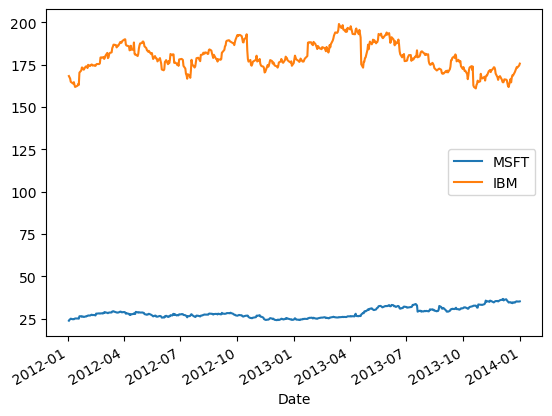

In [63]:
"""Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013"""
filtro_anni = (df.Date.dt.year == 2012) | (df.Date.dt.year == 2013)
filtro_aziende = ['MSFT', 'IBM']
df.loc[filtro_anni, filtro_aziende].plot() 

<Axes: ylabel='Frequency'>

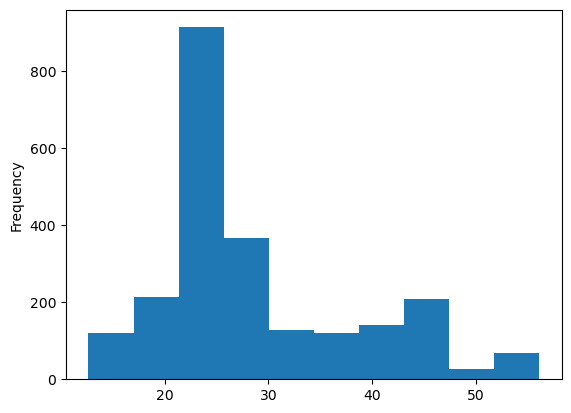

In [64]:
"""Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso"""
df.MSFT.plot(kind='hist')

C:\Users\Miriana Albergo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSFT', ylabel='Count'>

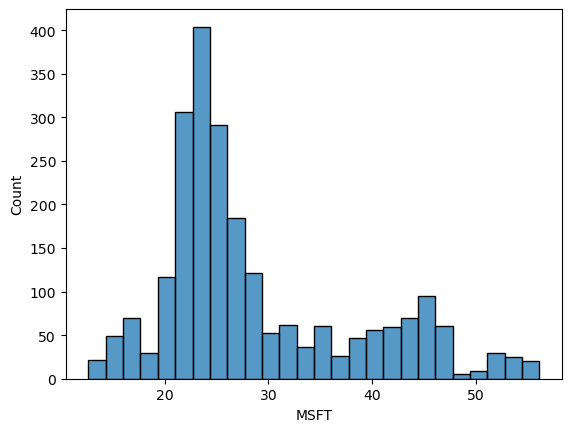

In [65]:
sns.histplot(data=df, x='MSFT')

In [69]:
df = pd.read_csv("C:\\Users\\Miriana Albergo\\EpicodeP\\metal_bands_2017.csv", encoding='latin1', index_col=0)
df

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


C:\Users\Miriana Albergo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miriana Albergo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fans', ylabel='band_name'>

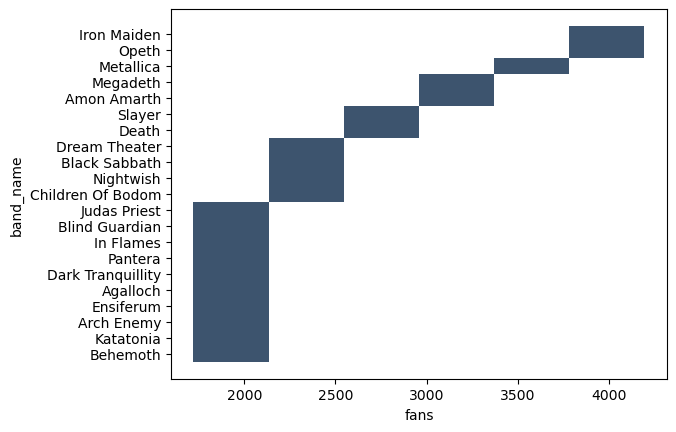

In [70]:
"""Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band"""
sns.histplot(data=df.iloc[:21], x='fans', y='band_name')

<Axes: xlabel='fans', ylabel='origin'>

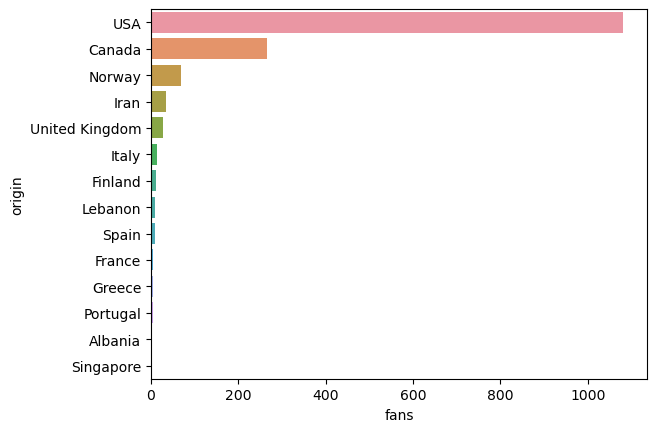

In [72]:
"""Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine (nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare ["style"] e non .style perché quest'ultimo è un metodo)"""
bands_progressive_trash = df[df['style'].str.contains('Progressive') & df['style'].str.contains('Thrash')]
fans_by_country = bands_progressive_trash.groupby('origin')['fans'].sum().reset_index()
sns.barplot(data = fans_by_country.sort_values('fans', ascending = False), x='fans', y='origin')


In [74]:
"""Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato)"""
df.formed = pd.to_datetime(df.formed, errors='coerce')
df

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975-01-01,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990-01-01,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981-01-01,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983-01-01,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988-01-01,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006-01-01,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003-01-01,Croatia,-,Avantgarde death
4997,Awake,0,2006-01-01,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983-01-01,Australia,1988,"Hard rock,Heavy"


C:\Users\Miriana Albergo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='formed', ylabel='Count'>

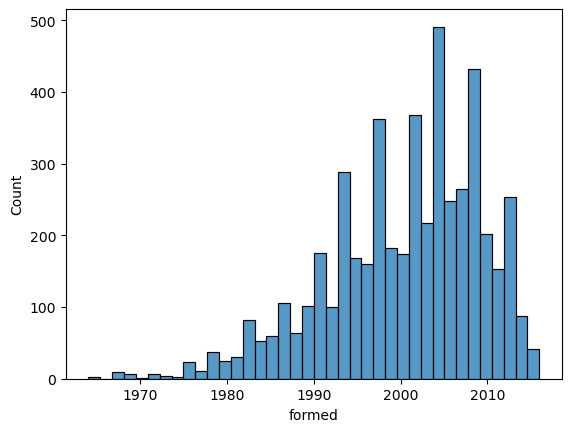

In [75]:
sns.histplot(data=df, x='formed')

In [76]:
df = pd.read_csv("C:\\Users\\Miriana Albergo\\EpicodeP\\election.csv")
df

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


<Axes: >

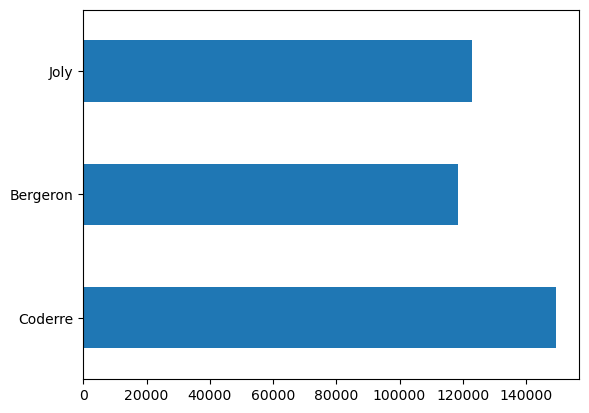

In [80]:
"""Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)"""
df.loc[:, ['Coderre', 'Bergeron', 'Joly']].sum().plot(kind='barh')


<Axes: xlabel='total', ylabel='district'>

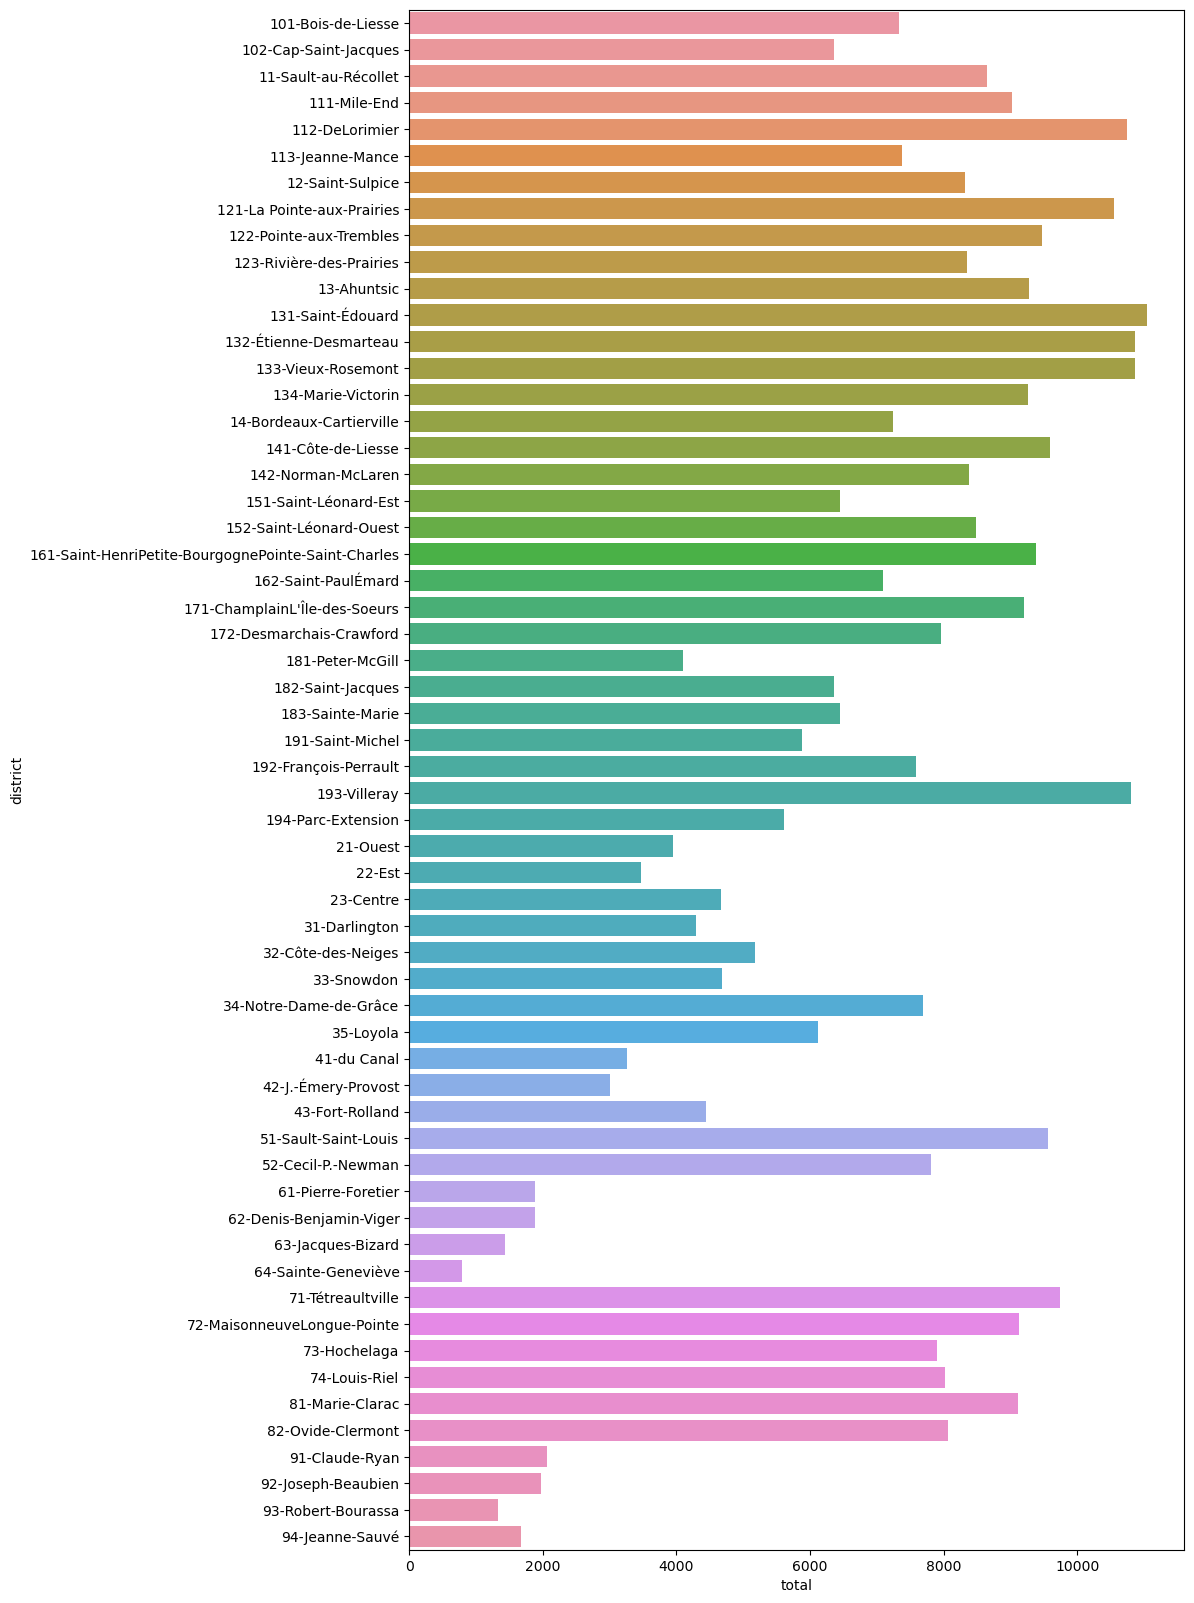

In [84]:
"""Con un grafico a barre confrontiamo il numero di votanti per ogni distretto"""
plt.figure(figsize=(10,20))
sns.barplot(data=df, y='district', x='total')

<Axes: ylabel='district'>

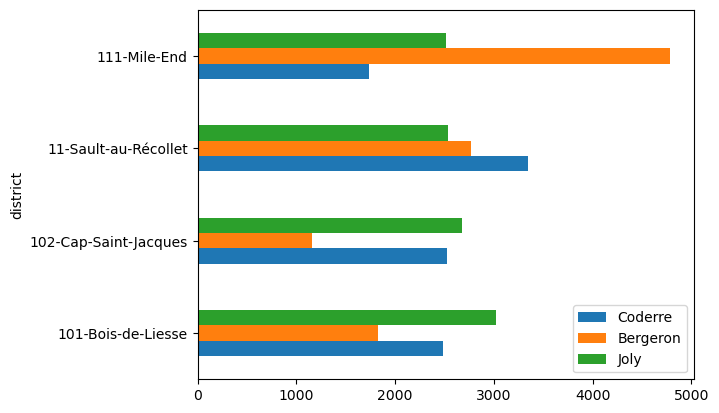

In [85]:
"""Visualizzare un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti per ogni candidato"""
df.iloc[:4].set_index('district').loc[:, ['Coderre', 'Bergeron', 'Joly']].plot(kind='barh')


In [87]:
df = pd.read_csv("C:\\Users\\Miriana Albergo\\EpicodeP\\party_in_nyc.csv")
df

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


<Axes: xlabel='City'>

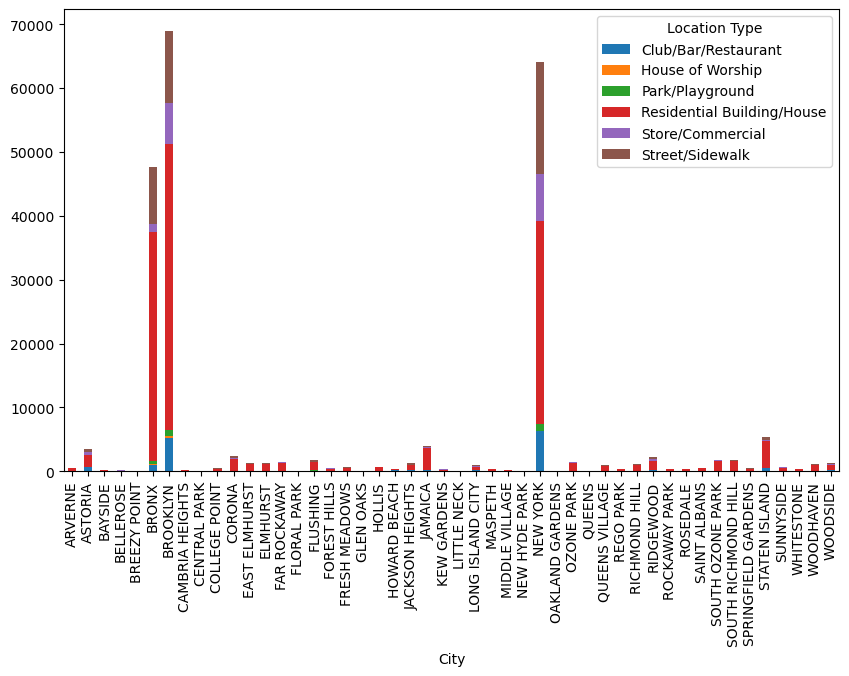

In [89]:
"""Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale"""
conteggio_chiamate = df.groupby(['City', 'Location Type']).size().unstack(fill_value=0)
conteggio_chiamate.plot(kind='bar', stacked=True, figsize=(10, 6))

In [93]:
"""Qual è il rettangolo di latitudine e longitudine considerato dal dataset?"""
min_lat = df['Latitude'].min()
max_lat = df['Latitude'].max()
min_lon = df['Longitude'].min()
max_lon = df['Longitude'].max()
print("Rettangolo di latitudine:", min_lat, "a", max_lat)
print("Rettangolo di longitudine:", min_lon, "a", max_lon)

Rettangolo di latitudine: 40.498819681472185 a 40.91217840308113
Rettangolo di longitudine: -74.25127710072611 a -73.70230256557906


In [94]:
"""Quante segnalazioni sono state fatte per case private?"""
# Filtriamo il DataFrame per le segnalazioni relative alle case private
segnalazioni_case_private = df[df['Location Type'] == 'Residential Building/House']

# Contiamo il numero di segnalazioni per le case private
numero_segnalazioni_case_private = segnalazioni_case_private.shape[0]

# Stampiamo il risultato
print("Numero di segnalazioni per le case private:", numero_segnalazioni_case_private)


Numero di segnalazioni per le case private: 146040


<Axes: xlabel='Borough', ylabel='count'>

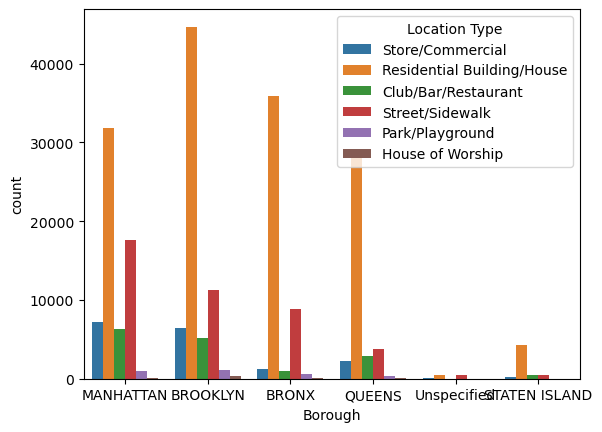

In [95]:
"""Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro hue="Location Type"""
sns.countplot(data=df, x='Borough', hue='Location Type')